[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2018-12-31   3866.839111   3868.742920   3725.867432   3742.700439   
2019-01-01   3746.713379   3850.913818   3707.231201   3843.520020   
2019-01-02   3849.216309   3947.981201   3817.409424   3943.409424   
2019-01-03   3931.048584   3935.685059   3826.222900   3836.741211   
2019-01-04   3832.040039   3865.934570   3783.853760   3857.717529   
...                  ...           ...           ...           ...   
2023-04-28  29481.013672  29572.791016  28929.609375  29340.261719   
2023-04-29  29336.566406  29452.455078  29088.042969  29248.488281   
2023-04-30  29245.515625  29952.029297  29114.021484  29268.806641   
2023-05-01  29227.103516  29329.935547  27680.792969  28091.568359   
2023-05-02  28087.175781  28881.298828  27924.123047  28680.537109   

               Adj C

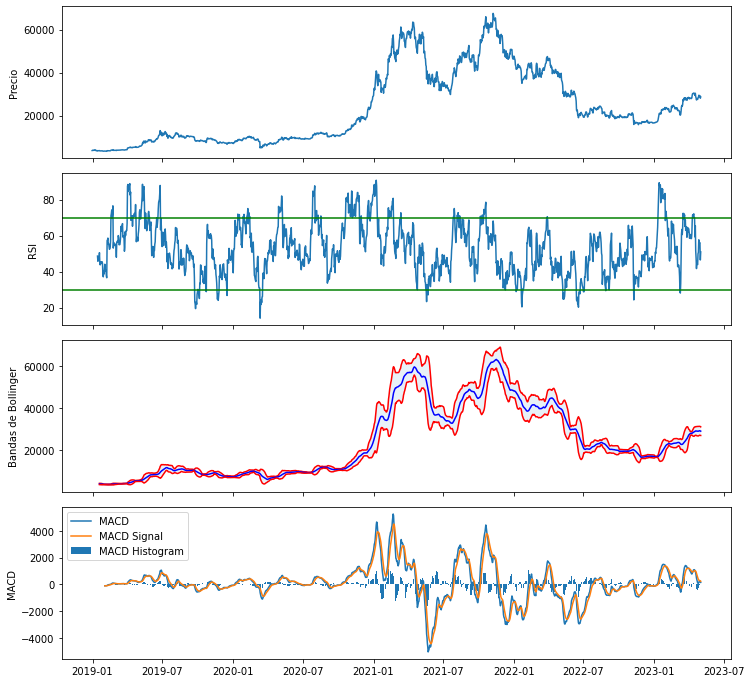

In [1]:
import pandas as pd
import talib
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Obtener datos históricos de precios de Bitcoin
btc = yf.download('BTC-USD', start='2019-01-01', end='2023-05-03')

btc.to_csv('BTC-USD.csv')

# Calcular los indicadores técnicos con TA-Lib (RSI -)
rsi = talib.RSI(btc['Close'], timeperiod=14)   # Indicador RSI
upper_band, middle_band, lower_band = talib.BBANDS(btc['Close'], timeperiod=20)  # Bandas de Bollinger
macd, macdsignal, macdhist = talib.MACD(btc['Close'], fastperiod=12, slowperiod=26, signalperiod=9) # indicador MACD

# Agregar las columnas de los indicadores al DataFrame de Bitcoin
btc['RSI'] = rsi
btc['Upper Band'] = upper_band
btc['Middle Band'] = middle_band
btc['Lower Band'] = lower_band
btc['MACD'] = macd
btc['MACD Signal'] = macdsignal
btc['MACD Histogram'] = macdhist

# Imprimir los datos de Bitcoin con las columnas de los indicadores
print(btc)

# Crear una figura con varias subgráficas
fig, axs = plt.subplots(4, sharex=True, figsize=(12, 12))

# Subgráfica 1: Precio de Bitcoin
axs[0].plot(btc['Close'])
axs[0].set_ylabel('Precio')

# Subgráfica 2: Indicador RSI
axs[1].plot(rsi)
axs[1].axhline(30, color='green')
axs[1].axhline(70, color='green')
axs[1].set_ylabel('RSI')

# Subgráfica 3: Bandas de Bollinger
axs[2].plot(upper_band, color='red')
axs[2].plot(middle_band, color='blue')
axs[2].plot(lower_band, color='red')
axs[2].fill_between(btc.index, lower_band, upper_band, alpha=0.1)
axs[2].set_ylabel('Bandas de Bollinger')

# Subgráfica 4: Indicador MACD
axs[3].plot(macd, label='MACD')
axs[3].plot(macdsignal, label='MACD Signal')
axs[3].bar(macdhist.index, macdhist, label='MACD Histogram')
axs[3].legend(loc='upper left')
axs[3].set_ylabel('MACD')

# Ajustar los márgenes de la figura
plt.subplots_adjust(hspace=0.1)

# Mostrar el gráfico
plt.show()

# Agregar las columnas de los indicadores al DataFrame de Bitcoin
btc['RSI'] = rsi
btc['Upper Band'] = upper_band
btc['Middle Band'] = middle_band
btc['Lower Band'] = lower_band
btc['MACD'] = macd
btc['MACD Signal'] = macdsignal
btc['MACD Histogram'] = macdhist



Precio de Bitcoin: En esta subgráfica se muestra el precio histórico de Bitcoin en dólares. Puedes ver cómo ha variado el precio a lo largo del tiempo y observar las tendencias alcistas y bajistas.

Indicador RSI: El RSI (Relative Strength Index) es un indicador de momentum que compara la magnitud de los movimientos alcistas y bajistas del precio de un activo en un período de tiempo determinado. El RSI se representa en una escala de 0 a 100, y se considera que un valor por encima de 70 indica que el activo está sobrecomprado y un valor por debajo de 30 indica que está sobrevendido. En esta subgráfica, se muestra el valor del RSI para Bitcoin y se agregan dos líneas horizontales a 30 y 70 para ayudar a identificar los niveles de sobrecompra y sobreventa.

Bandas de Bollinger: Las Bandas de Bollinger son un indicador técnico que se utiliza para medir la volatilidad de un activo. Las bandas se construyen a partir de una media móvil y un valor de desviación estándar, y se colocan por encima y por debajo de la media móvil. En esta subgráfica, se muestran las bandas de Bollinger para Bitcoin, así como la media móvil correspondiente. También se agrega un sombreado entre las bandas superior e inferior para resaltar los cambios en la volatilidad.

Indicador MACD: El MACD (Moving Average Convergence Divergence) es un indicador de tendencia que se utiliza para identificar cambios en la dirección de la tendencia de un activo. El MACD se calcula restando la media móvil exponencial de 26 períodos de la media móvil exponencial de 12 períodos. A continuación, se calcula una media móvil exponencial de 9 períodos del MACD, lo que se conoce como la señal MACD. En esta subgráfica, se muestran el MACD y la señal MACD para Bitcoin, así como el histograma del MACD, que representa la diferencia entre el MACD y la señal MACD. El cruce de la línea MACD y la línea de señal puede indicar un cambio en la dirección de la tendencia.

Precios de cierre de Bitcoin: [29268.80664062 28091.56835938 28680.53710938]
Predicciones del modelo: [29670.12506798 28194.08728428 28577.53115047]


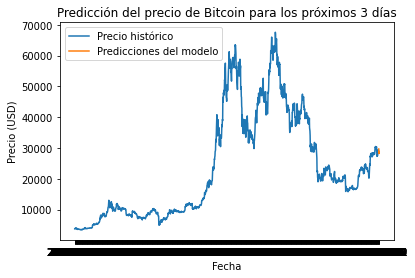

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Cargar los datos de Bitcoin
btc = pd.read_csv('BTC-USD.csv')

# Seleccionar los datos de entrenamiento y prueba
train_data = btc[:-3]
test_data = btc[-3:]

# Definir las características y el objetivo para el modelo
X_train = train_data[['Open', 'High', 'Low', 'Volume']]
y_train = train_data['Close']
X_test = test_data[['Open', 'High', 'Low', 'Volume']]

# Entrenar el modelo de regresión lineal
reg = LinearRegression().fit(X_train, y_train)

# Predecir el valor del precio de cierre de Bitcoin para los próximos 3 días
predicted_price = reg.predict(X_test)

# Mostrar el precio de cierre de Bitcoin y las predicciones del modelo
print('Precios de cierre de Bitcoin:', test_data['Close'].values)
print('Predicciones del modelo:', predicted_price)

# Graficar el precio histórico y las predicciones del modelo
plt.plot(train_data['Date'], train_data['Close'], label='Precio histórico')
plt.plot(test_data['Date'], predicted_price, label='Predicciones del modelo')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.title('Predicción del precio de Bitcoin para los próximos 3 días')
plt.legend()
plt.show()